In [1]:
# Scientific libraries
import numpy_html
import numpy as np

# import Pandas

import pandas as pd

# Graphic libraries

import matplotlib.pyplot as plt
%matplotlib notebook
from jupyterthemes import jtplot
plt.style.use('mike') 
jtplot.style(context='notebook', fscale=1, grid=False)

from mpltools import color as mpl_color


from glob import glob
import copy
import collections

green = "#1DEBA6"
red = "#FF0059"
yellow = "#F6EF5B"

dark = red
mid= yellow


import stan_utility
#import warnings
#warnings.simplefilter('ignore')

# Hierarchical Generalized Linear Models

While we have been fitting lines, it is important to note that a linear model is a special case of a generalized linear models (GLMs). We can write this as:

$$ y_{i}=\beta_{0}+\beta_{1} x_{1 i}+\ldots+\beta_{p} x_{p i}+\epsilon_{i} $$

These models are used in variety of applications. Fitting them can be difficult but is well studied. In particular, depending on their likelihood, the models can be used for high-dimensional prediction and classification. In many ways, these are the Bayesian/probabilistic version machine learning. 

However, we will stick with our simple linear model to discuss hierarchies. A hierarchical model is one where parameters can depend on each other via different levels of the model. 


$$ \pi\left(\phi, \theta_{j} | y\right) \propto \pi\left(y_{j} | \theta_{j}\right) \pi\left(\theta_{j} | \phi\right) \pi(\phi) $$

#### picture

## Linear model with multiple intercepts

Now we will build generate some data from a model

In [2]:
np.random.seed(1234)

In [3]:
N = 4500
N_groups = 10

x1 = np.random.uniform(-1,1, size=N)

groups = np.array([int(N/N_groups) * [i] for i in range(N_groups) ]).flatten()

beta0 = np.random.normal(loc=0,scale=3., size=N_groups)

beta1 = 1

In [5]:
mu = beta1*x1 + beta0[groups]

In [6]:

sigma = 2

y = np.random.normal(loc= mu, scale=sigma, size=N)

In [8]:
cc = mpl_color.color_mapper?

In [9]:
cc = mpl_color.color_mapper([min(beta0),max(beta0)],'viridis')

<IPython.core.display.Javascript object>


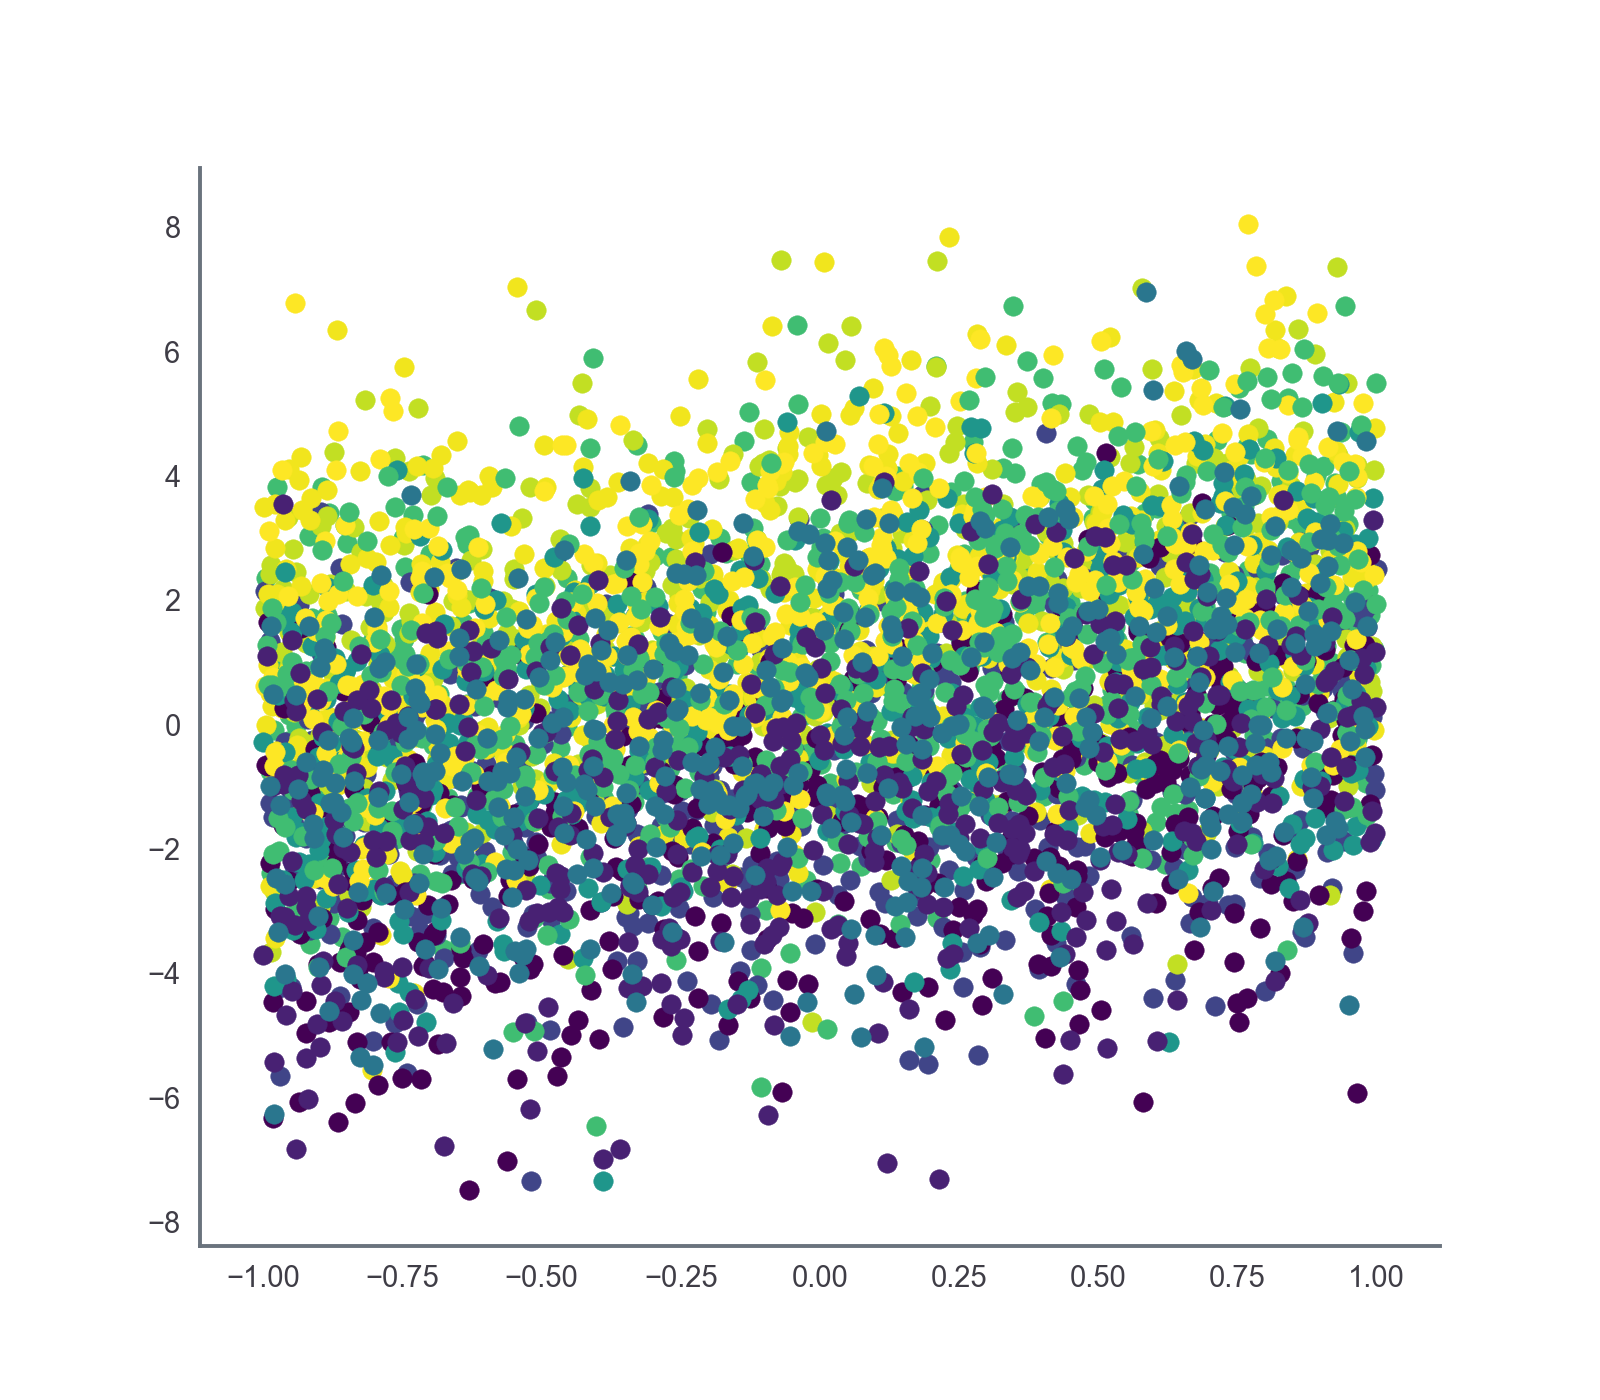

In [10]:
fig, ax = plt.subplots()


for i in range(N_groups):
    
    idx = groups == i
    
    ax.scatter(x1[idx], y[idx],color=cc(beta0[i]))
    
    
    
    

In [11]:
N_model = 100
x_model = np.linspace(-1,1,N_model)

data  = dict(N=N, N_groups=N_groups,  groups=groups+1, x1=x1, y=y, sigma=sigma, N_model=N_model, x_model=x_model)

In [13]:
model = stan_utility.compile_model('hglm.stan', model_name='hglm')
fit = model.sampling(data=data, iter=2000,seed=32423)

Using cached StanModel


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


<IPython.core.display.Javascript object>


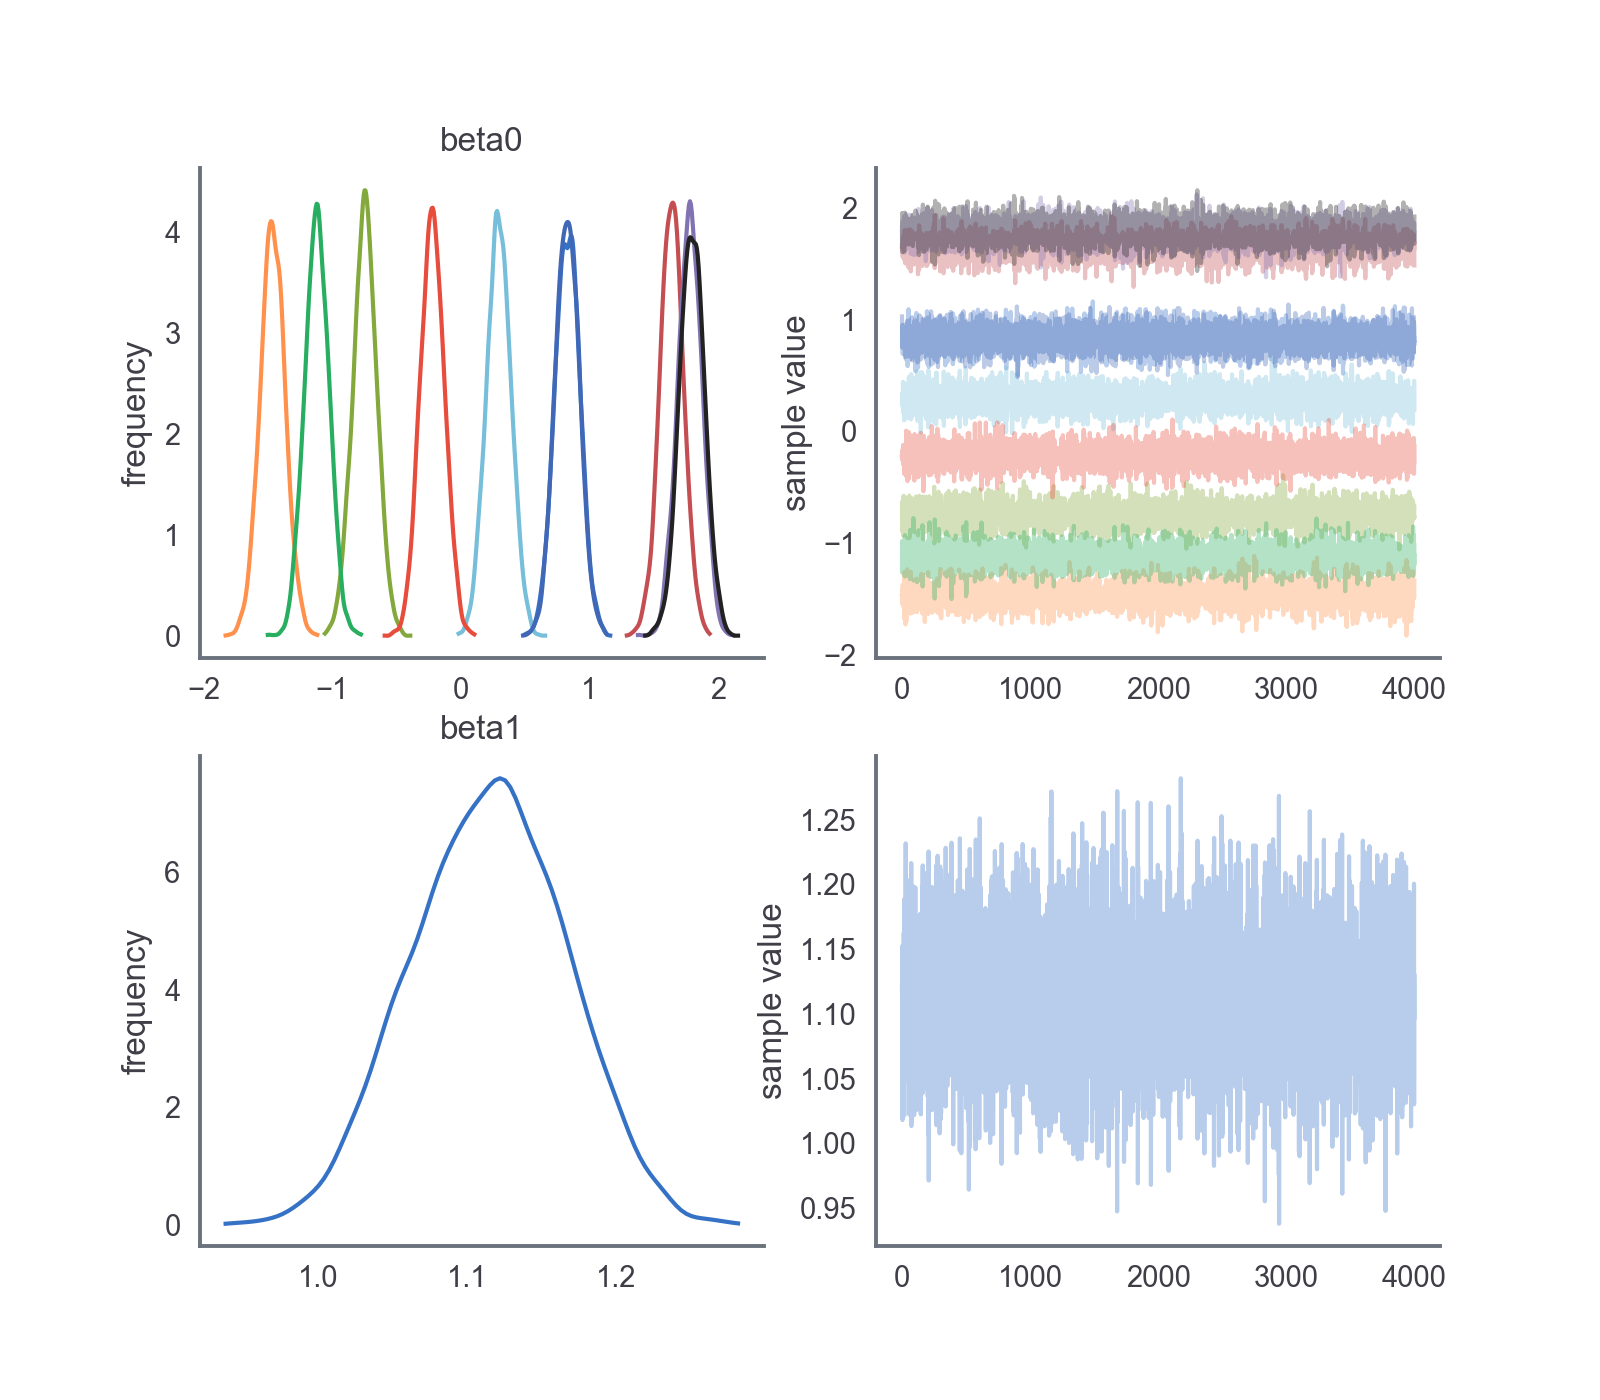

In [14]:
fit.plot(pars=['beta0', 'beta1']);

<IPython.core.display.Javascript object>


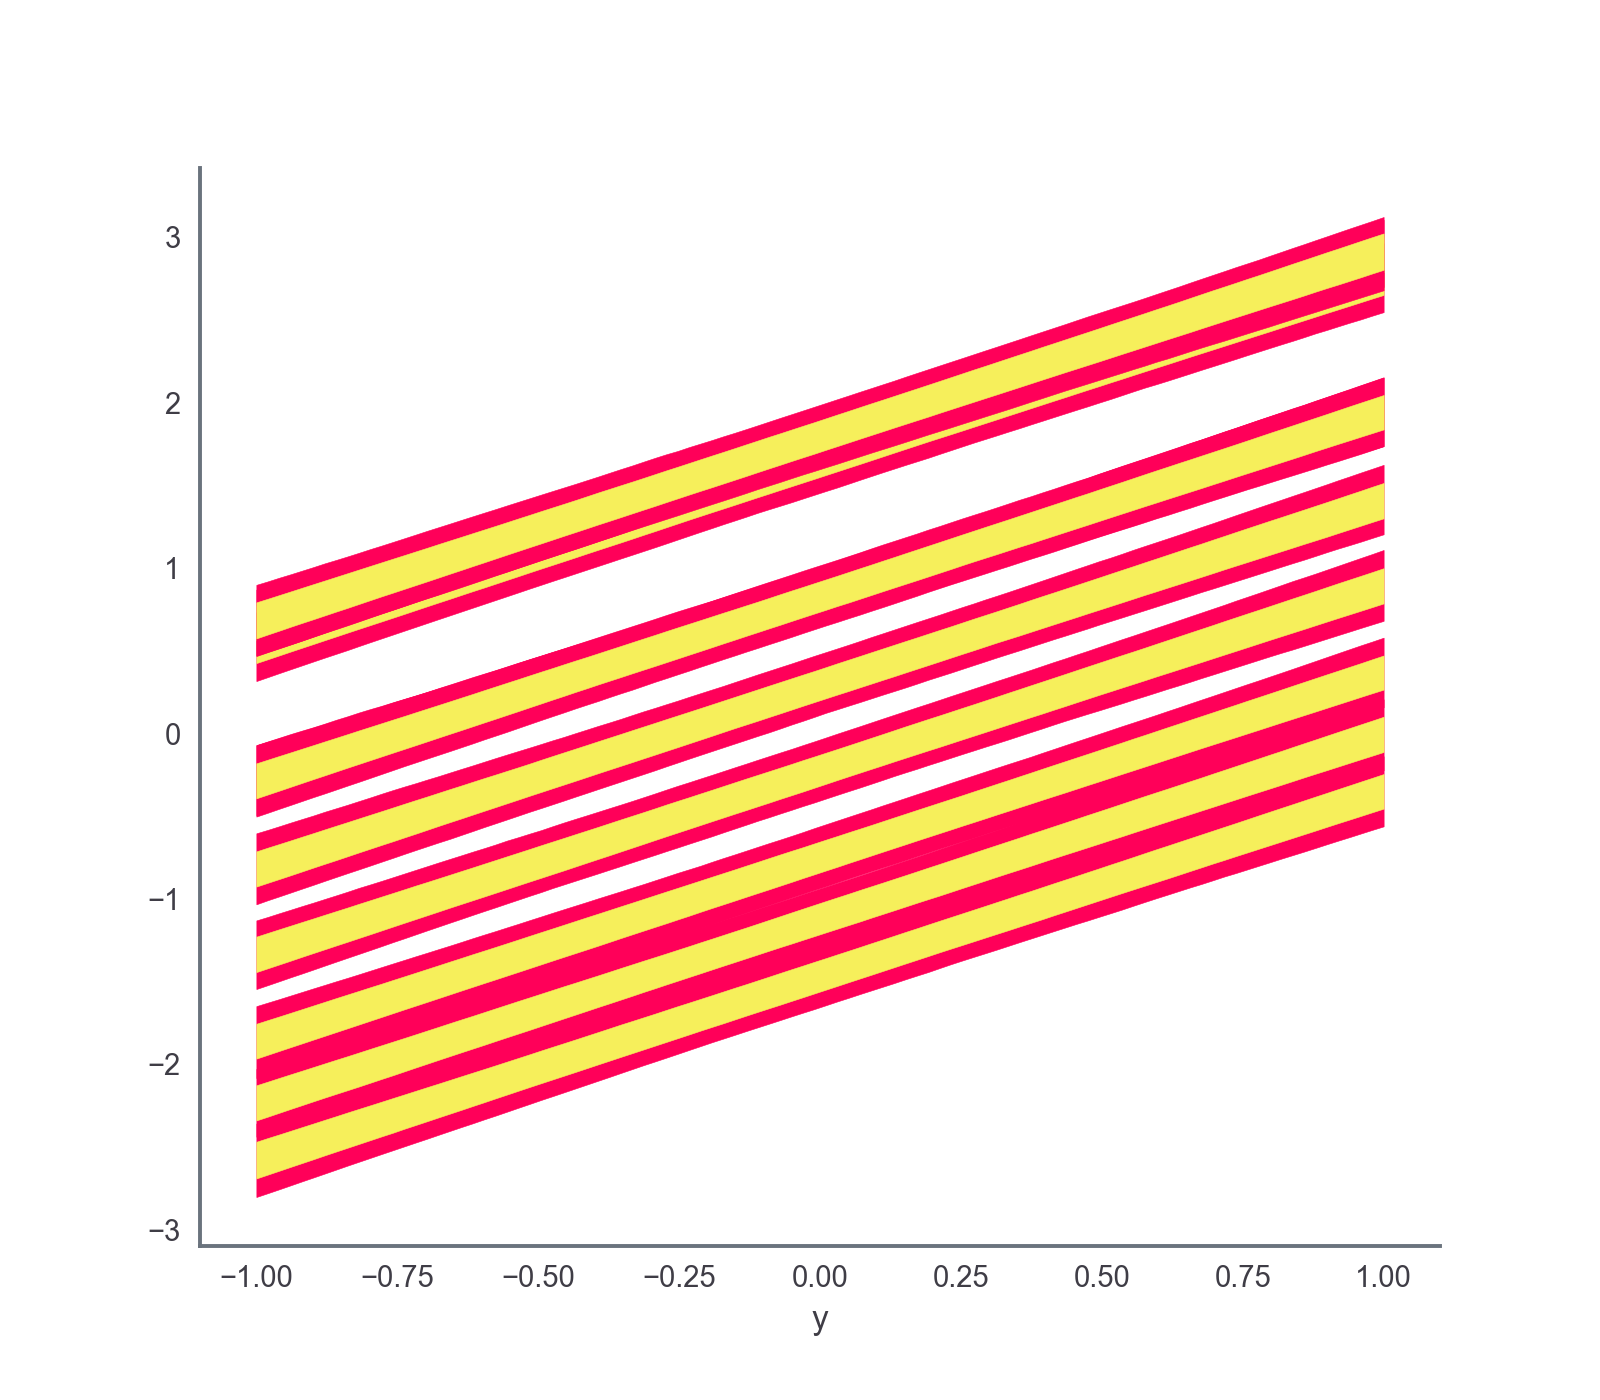

Text(0.5, 0, 'y')

In [15]:
fig, ax = plt.subplots()

chain = fit.extract()
for n in range(N_groups):
    level = 95

    ax.fill_between(x_model,
                    np.percentile(chain['lines'][:,n,:], 50 - 0.5*level, axis=0 ),
                    np.percentile(chain['lines'][:,n,:], 50 + 0.5*level, axis=0 ),
                    color=dark)

    level = 68

    ax.fill_between(x_model,
                    np.percentile(chain['lines'][:,n,:], 50 - 0.5*level, axis=0 ),
                    np.percentile(chain['lines'][:,n,:], 50 + 0.5*level, axis=0 ),
                    color=mid)

#ax.plot(x_model, m_true*x_model+b_true,color='limegreen',ls='--',zorder=10000)

#ax.scatter(x_obs, y_obs, c='k')

ax.set_xlabel('x')
ax.set_xlabel('y')

# Multi slope

In [18]:
N = 4500
N_groups = 10
x1 = np.random.uniform(-1,1, size=N)

groups = np.array([int(N/N_groups) * [i] for i in range(N_groups) ]).flatten()

beta0 = np.random.normal(loc=0,scale=3., size=N_groups)

beta1 = np.random.normal(loc=0,scale=3., size=N_groups)




mu = beta1[groups]*x1 + beta0[groups]

In [19]:

sigma = 2

y = np.random.normal(loc= mu, scale=sigma, size=N)

<IPython.core.display.Javascript object>


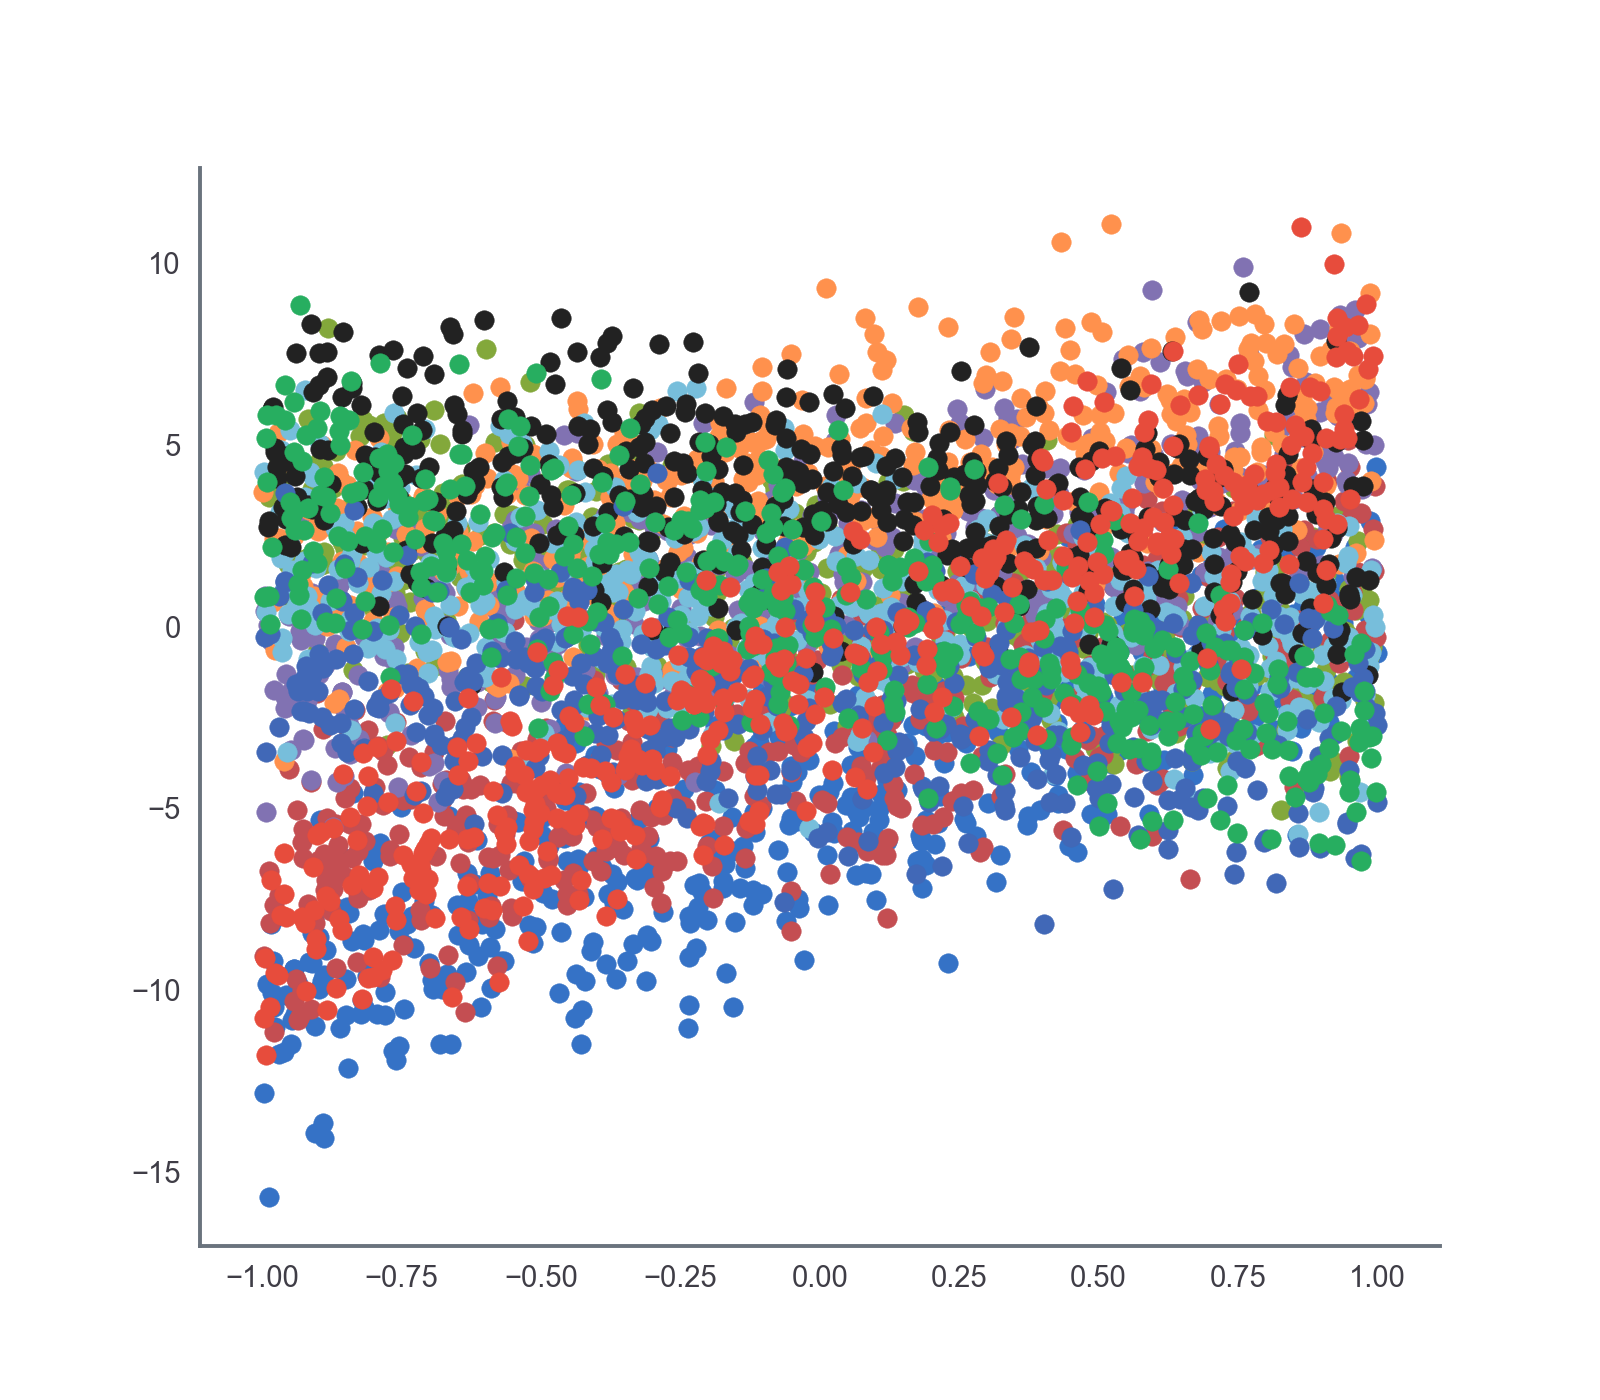

In [20]:
fig, ax = plt.subplots()


for i in range(N_groups):
    
    idx = groups == i
    
    ax.scatter(x1[idx], y[idx])
    
    
    
    

In [128]:
N_model = 100
x_model = np.linspace(-1,1,N_model)

data  = dict(N=N, N_groups=N_groups,  groups=groups+1, x1=x1, y=y, sigma=sigma, N_model=N_model, x_model=x_model)

In [129]:
model = stan_utility.compile_model('hglm2.stan', model_name='hglm2')
fit = model.sampling(data=data, iter=2000)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL hglm2_d0f351e0248592c840edbe2f2cdced45 NOW.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


<IPython.core.display.Javascript object>


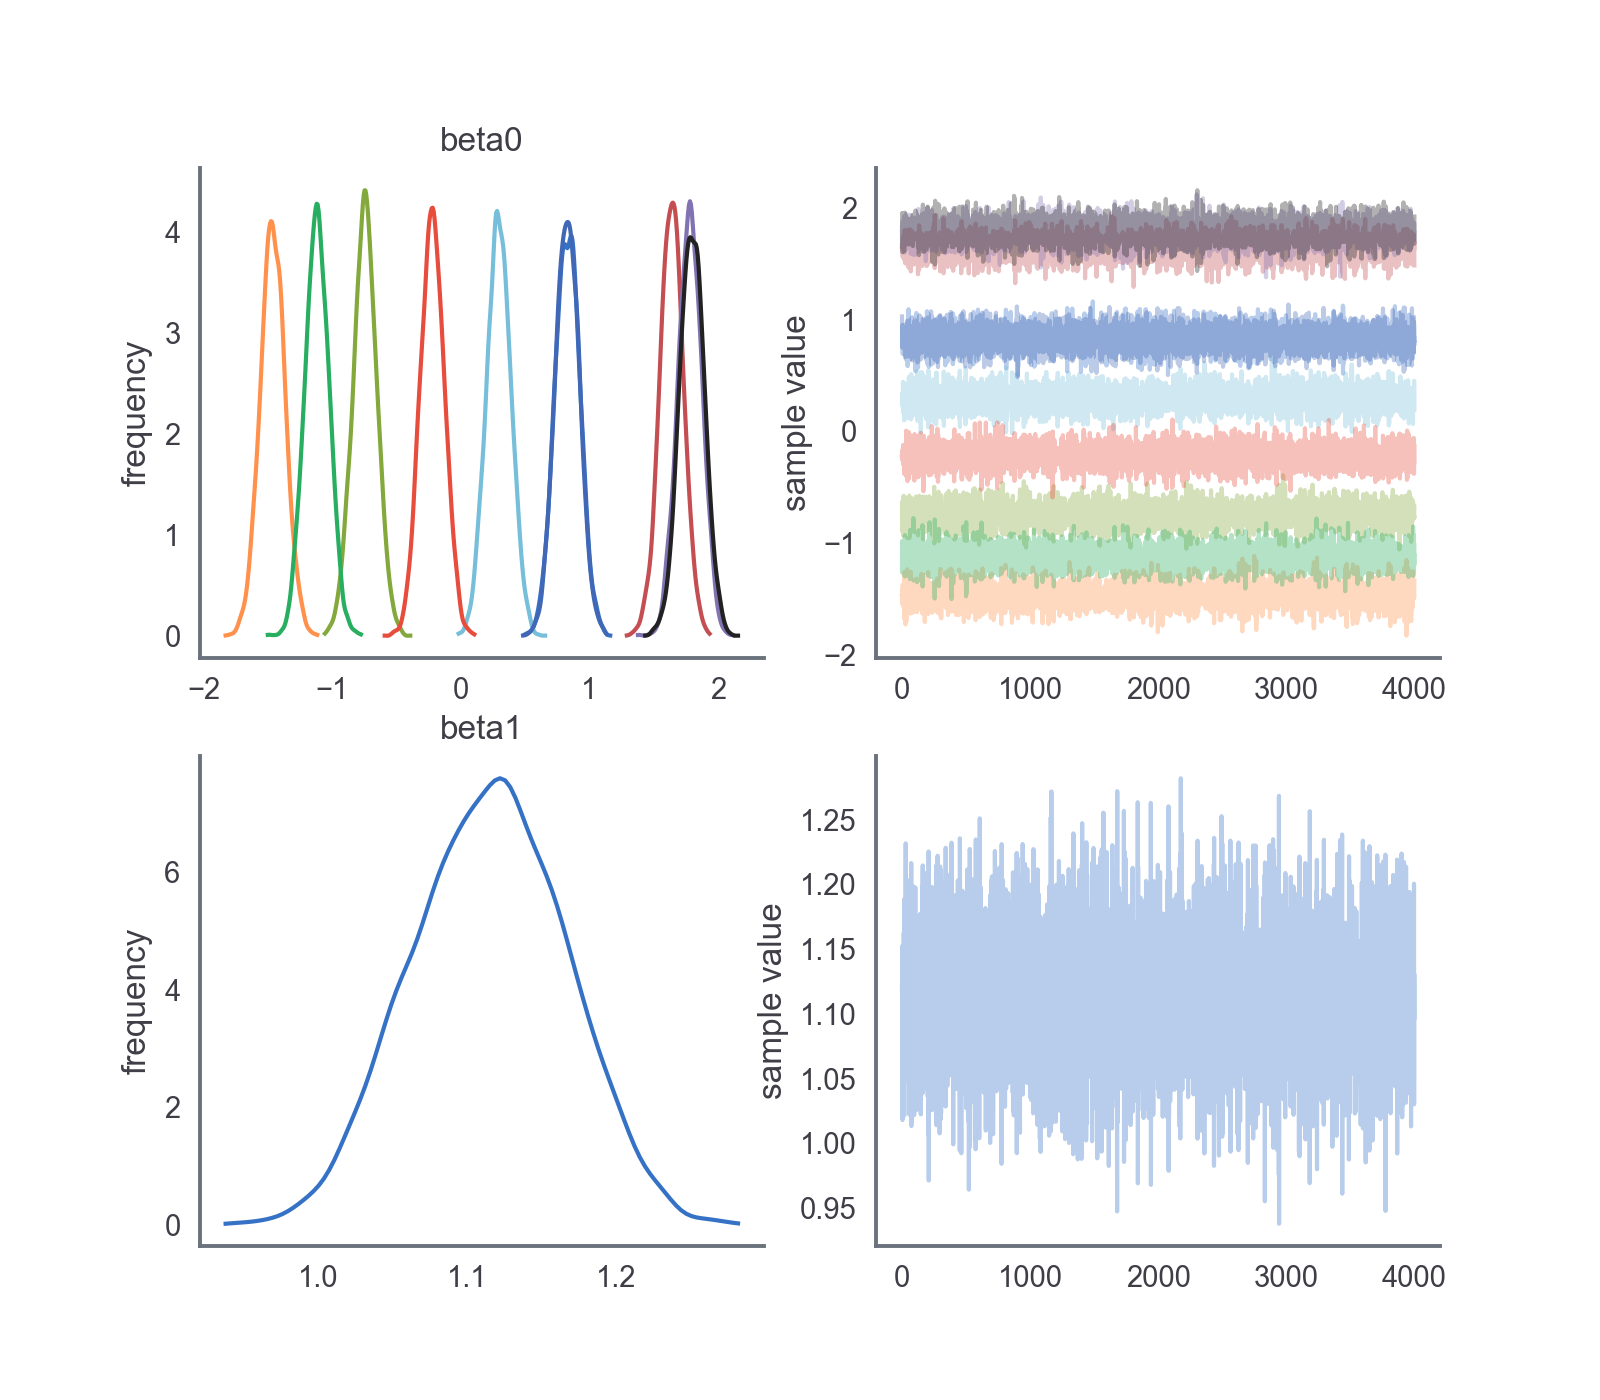

In [21]:
fit.plot(pars=['beta0', 'beta1']);

<IPython.core.display.Javascript object>


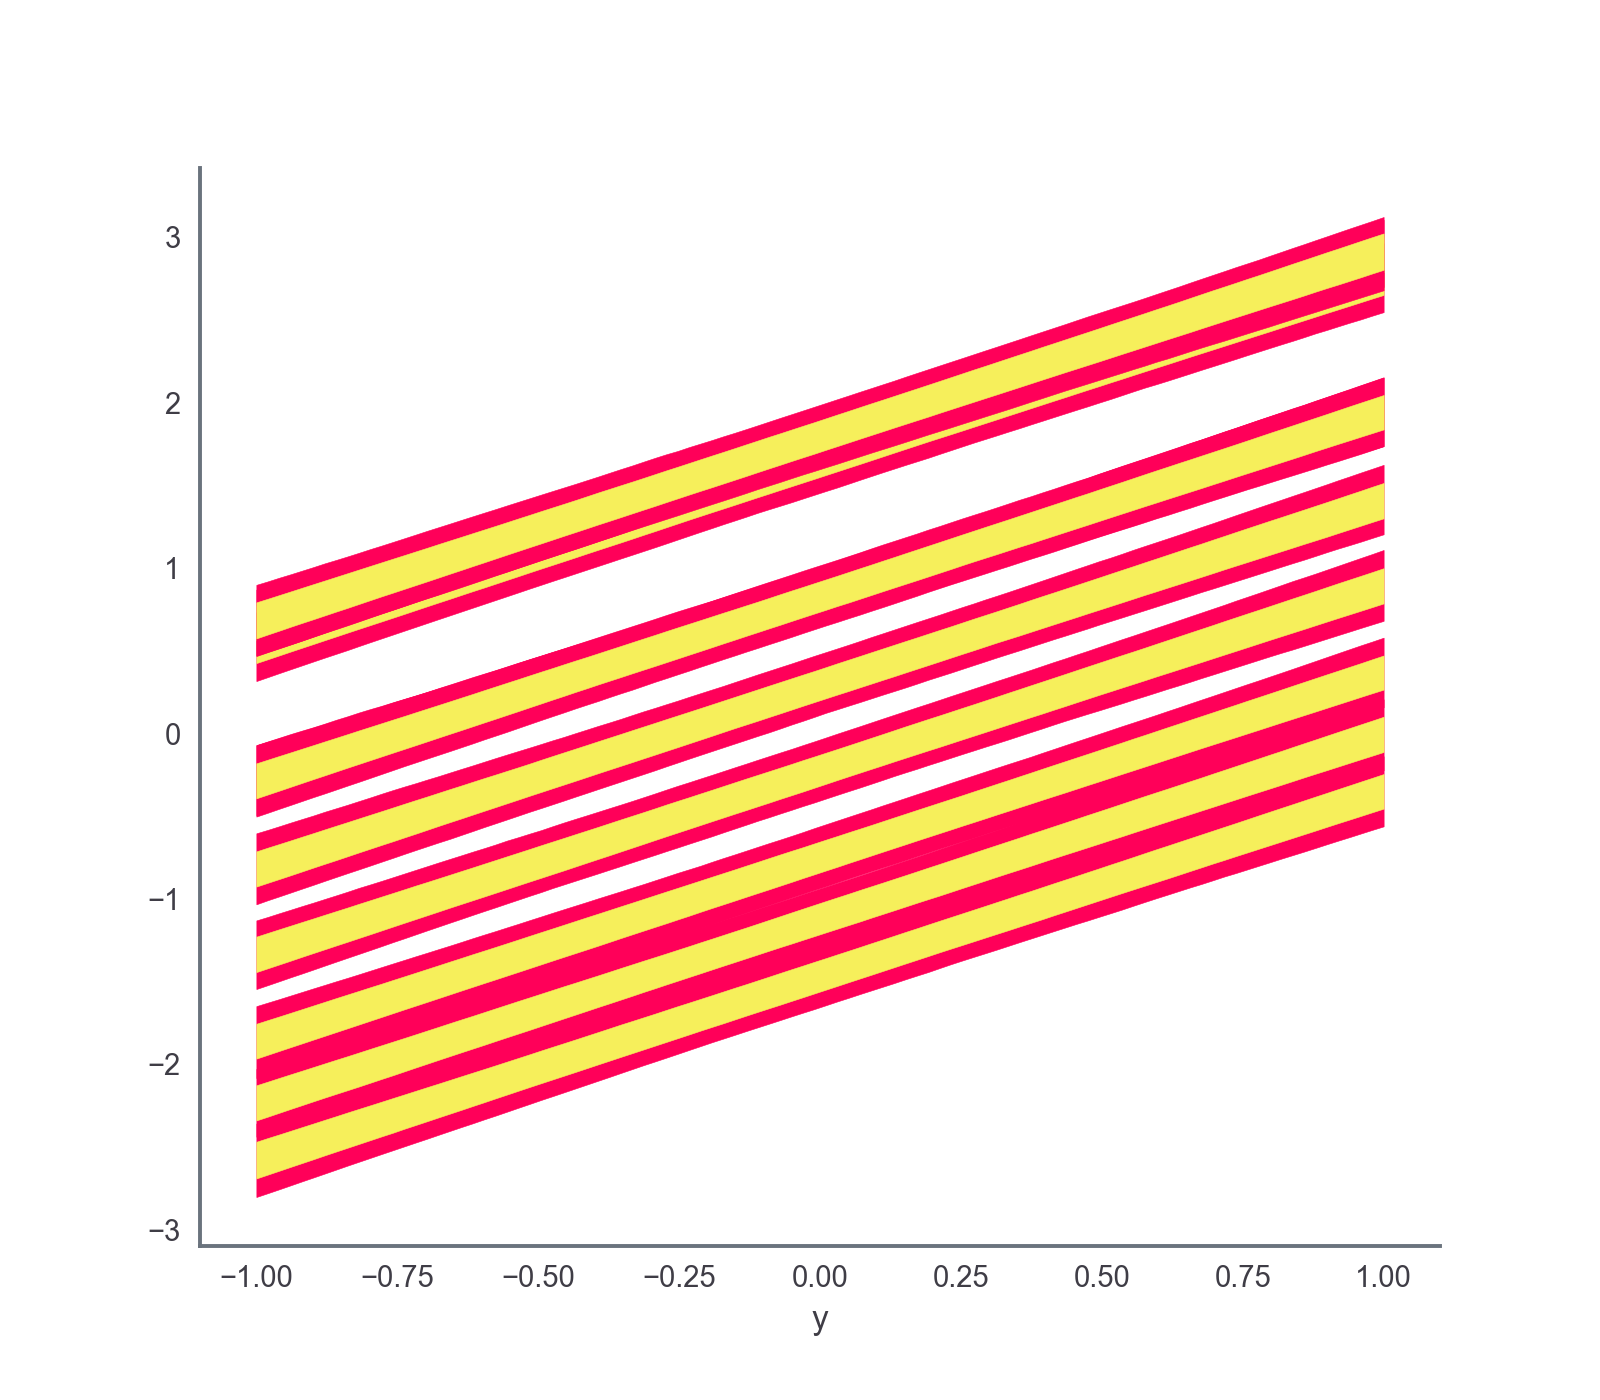

Text(0.5, 0, 'y')

In [22]:
fig, ax = plt.subplots()

chain = fit.extract()
for n in range(N_groups):
    level = 95

    ax.fill_between(x_model,
                    np.percentile(chain['lines'][:,n,:], 50 - 0.5*level, axis=0 ),
                    np.percentile(chain['lines'][:,n,:], 50 + 0.5*level, axis=0 ),
                    color=dark)

    level = 68

    ax.fill_between(x_model,
                    np.percentile(chain['lines'][:,n,:], 50 - 0.5*level, axis=0 ),
                    np.percentile(chain['lines'][:,n,:], 50 + 0.5*level, axis=0 ),
                    color=mid)

#ax.plot(x_model, m_true*x_model+b_true,color='limegreen',ls='--',zorder=10000)

#ax.scatter(x_obs, y_obs, c='k')

ax.set_xlabel('x')
ax.set_xlabel('y')